<h1>EDA for the West Nile Virus Dataset</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

In [2]:
#loading cleaned data
y = pd.read_pickle('./data/y.pkl')
test = pd.read_pickle('./data/test.pkl')
X = pd.read_pickle('./data/train.pkl')

<h2>Exploring Values</h2>
First I will explore hist plots for relevant columns

In [3]:
# for i,c in enumerate(X.columns):
#     plt.figure(i)
#     sns.histplot(data=X,x=c, bins =30)

Distributions are somewhat as expected. Temperatures, dew point, percipitation, snow fall behave exactly as expected. Not many surpsises from the histplots. 

<AxesSubplot:xlabel='month', ylabel='PrecipTotal_x'>

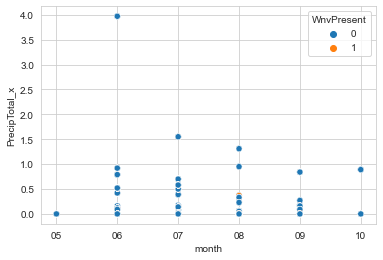

In [4]:
sns.scatterplot(data=X,x='month',y='PrecipTotal_x',hue=y)

<AxesSubplot:xlabel='PrecipTotal_x', ylabel='Tavg_x'>

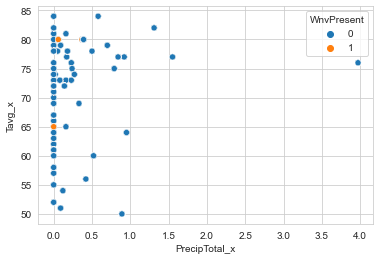

In [9]:
sns.scatterplot(data=X,x='PrecipTotal_x',y='Tavg_x',hue=y)

<AxesSubplot:xlabel='AvgSpeed_x', ylabel='Tavg_x'>

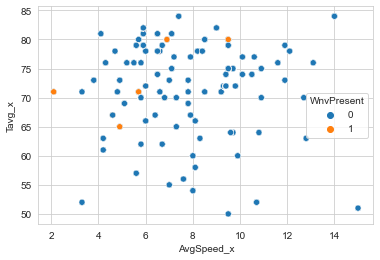

In [10]:
sns.scatterplot(data=X,x='AvgSpeed_x',y='Tavg_x',hue=y)

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

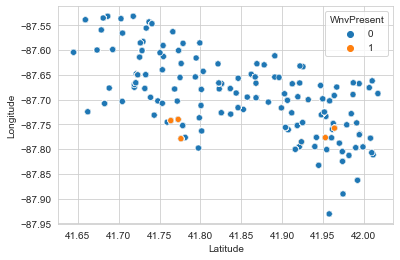

In [12]:
sns.scatterplot(data=X,y='Longitude',x='Latitude',hue=y)

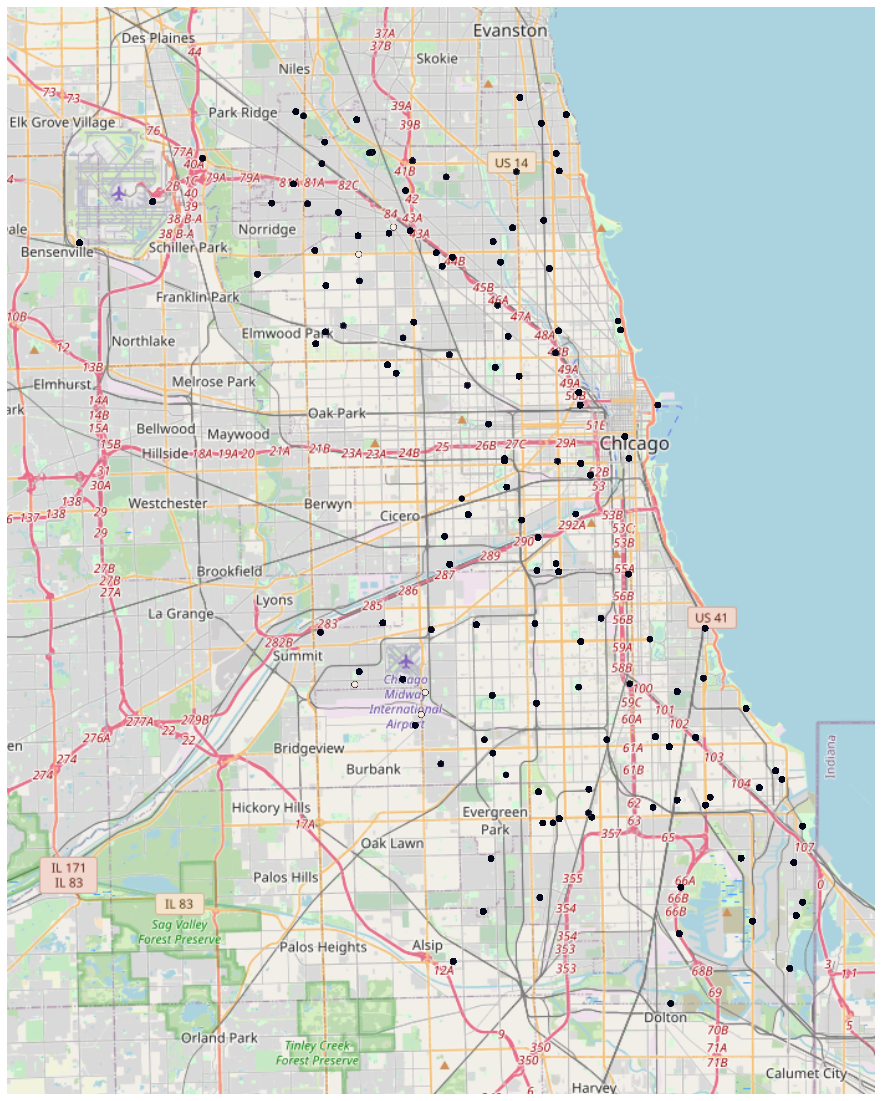

In [16]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geoplot as gplt
import geoplot.crs as gcrs

def plot_map_hue(df ,y):
    
    geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
    gdf = GeoDataFrame(df, geometry=geometry)  

    ax = gplt.webmap(gdf,figsize=(20, 20), projection=gcrs.WebMercator())
    gplt.pointplot(gdf['geometry'], ax=ax,hue=y)
    
plot_map_hue(X,y)



Interesting! From this map we see that three of the spottings are next to the airport. I wonder why?

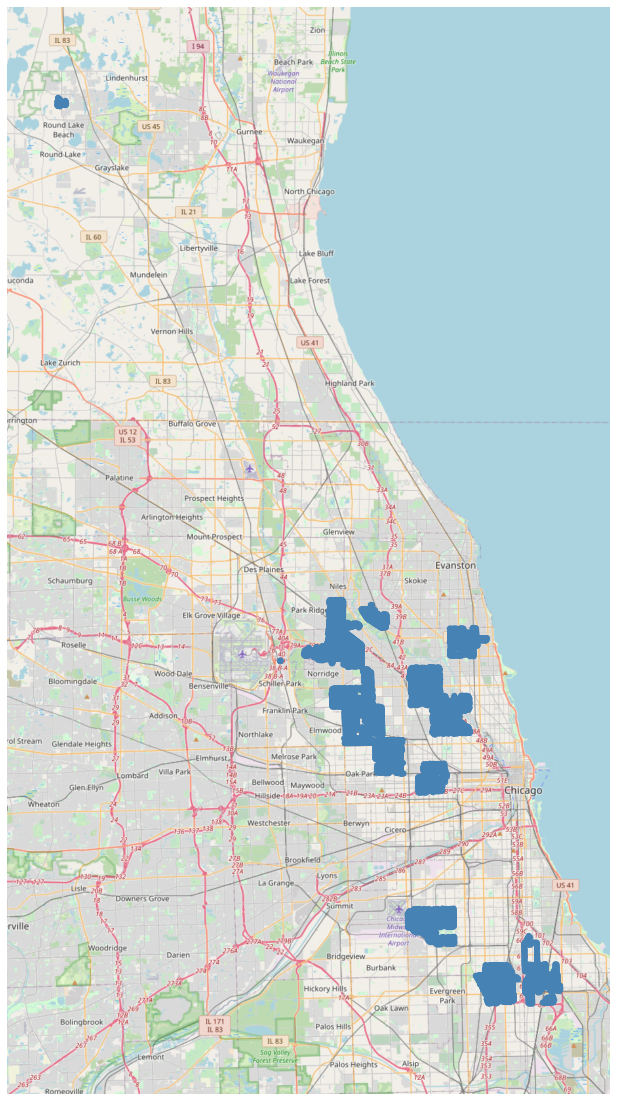

In [21]:
sp = pd.read_csv('./data/spray.csv.zip')

def plot_map(df):
    
    geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
    gdf = GeoDataFrame(df, geometry=geometry)  

    ax = gplt.webmap(gdf,figsize=(20, 20), projection=gcrs.WebMercator())
    gplt.pointplot(gdf['geometry'], ax=ax)
    
plot_map(sp)


There is spraying near the airport, but not quite as far west as we see the mosquitos showing up.

<AxesSubplot:>

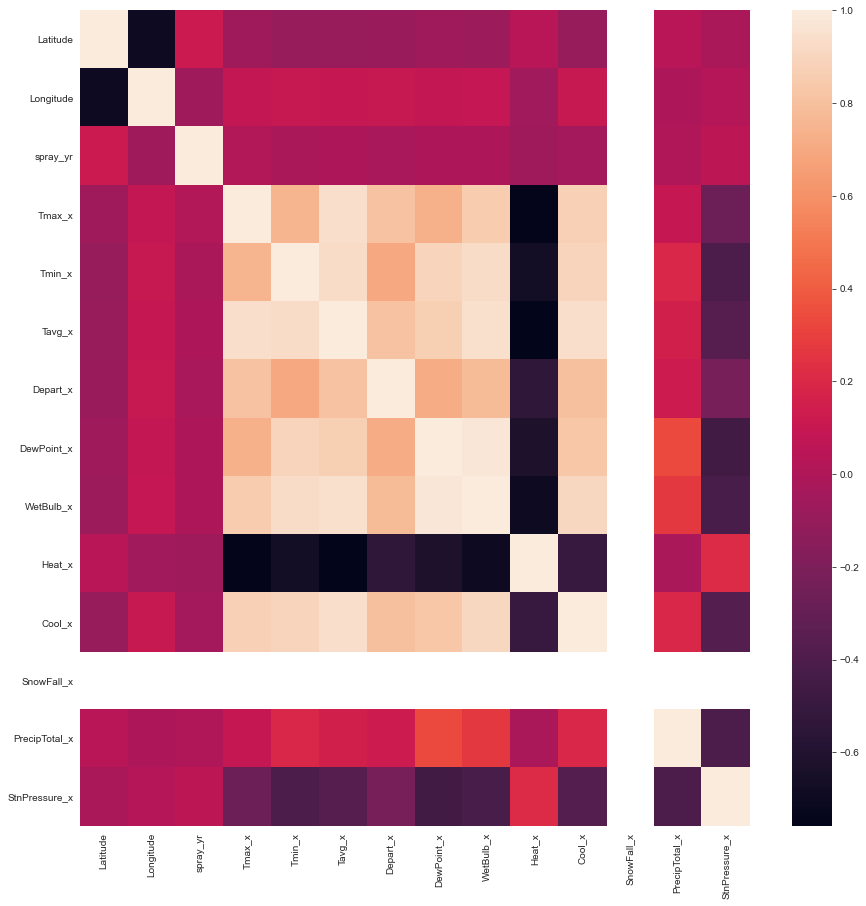

In [26]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(X.iloc[:,:19].corr(),ax=ax)

Temperature factors seem important. This goes along well with my conception of mosquitos, which is that they like warm, humid weather.

In [34]:
X.iloc[:,:10].describe().T

count       mean       std        min        25%        50%  \
Latitude   10506.0  41.841139  0.112742  41.644612  41.732984  41.846283   
Longitude  10506.0 -87.699908  0.096514 -87.930995 -87.760070 -87.694991   
spray_yr   10506.0   0.112698  0.316238   0.000000   0.000000   0.000000   
Tmax_x     10506.0  81.847992  8.278380  57.000000  78.000000  83.000000   
Tmin_x     10506.0  62.716067  7.677123  41.000000  58.000000  64.000000   
Tavg_x     10506.0  72.530459  7.523979  50.000000  69.000000  74.000000   
Depart_x   10506.0   2.740244  6.486468 -12.000000  -2.000000   4.000000   

                 75%        max  
Latitude   41.954690  42.017430  
Longitude -87.627796 -87.531635  
spray_yr    0.000000   1.000000  
Tmax_x     88.000000  96.000000  
Tmin_x     69.000000  76.000000  
Tavg_x     78.000000  84.000000  
Depart_x    8.000000  18.000000

In [35]:
X.iloc[:,10:20].describe().T

count       mean       std    min    25%    50%    75%    max
DewPoint_x     10506.0  59.759566  7.785968  39.00  54.00  60.00  67.00  73.00
WetBulb_x      10413.0  64.631998  6.808137  46.00  61.00  66.00  70.00  76.00
Heat_x         10506.0   0.958214  2.863326   0.00   0.00   0.00   0.00  15.00
Cool_x         10506.0   8.488673  5.669404   0.00   4.00   9.00  13.00  19.00
SnowFall_x     10506.0   0.000000  0.000000   0.00   0.00   0.00   0.00   0.00
PrecipTotal_x  10506.0   0.180601  0.472513   0.00   0.00   0.00   0.16   3.97
StnPressure_x  10413.0  29.252731  0.113773  28.89  29.18  29.26  29.34  29.59
SeaLevel_x     10506.0  29.966956  0.116038  29.60  29.89  29.98  30.05  30.33

In [36]:
X.iloc[:,20:30].describe().T

count       mean       std  min  25%   50%   75%   max
ResultSpeed_x  10506.0   5.976623  2.838635  0.1  3.8   5.5   7.6  14.6
ResultDir_x    10506.0  17.520084  9.509825  1.0  8.0  19.0  25.0  36.0
AvgSpeed_x     10506.0   7.435142  2.557916  2.1  5.6   7.1   9.4  15.0
BR_x           10506.0   0.278317  0.448192  0.0  0.0   0.0   1.0   1.0
HZ_x           10506.0   0.171331  0.376816  0.0  0.0   0.0   0.0   1.0
RA_x           10506.0   0.319912  0.466465  0.0  0.0   0.0   1.0   1.0
TSRA_x         10506.0   0.132115  0.338632  0.0  0.0   0.0   0.0   1.0
VCTS_x         10506.0   0.018942  0.136325  0.0  0.0   0.0   0.0   1.0
FU_x           10506.0   0.000000  0.000000  0.0  0.0   0.0   0.0   0.0
TS_x           10506.0   0.151628  0.358677  0.0  0.0   0.0   0.0   1.0

In [37]:
X.iloc[:,30:40].describe().T

count       mean       std   min   25%   50%   75%   max
DZ_x    10506.0   0.016181  0.126178   0.0   0.0   0.0   0.0   1.0
BCFG_x  10506.0   0.000000  0.000000   0.0   0.0   0.0   0.0   0.0
FG+_x   10506.0   0.000000  0.000000   0.0   0.0   0.0   0.0   0.0
MIFG_x  10506.0   0.000000  0.000000   0.0   0.0   0.0   0.0   0.0
FG_x    10506.0   0.010661  0.102703   0.0   0.0   0.0   0.0   1.0
SQ_x    10506.0   0.000000  0.000000   0.0   0.0   0.0   0.0   0.0
SN_x    10506.0   0.000000  0.000000   0.0   0.0   0.0   0.0   0.0
VCFG_x  10506.0   0.000000  0.000000   0.0   0.0   0.0   0.0   0.0
GR_x    10506.0   0.000000  0.000000   0.0   0.0   0.0   0.0   0.0
Tmax_y  10506.0  81.986198  8.301924  58.0  78.0  83.0  87.0  97.0

In [38]:
X.iloc[:,40:50].describe().T

count       mean       std   min   25%   50%   75%   max
Tmin_y      10506.0  64.578336  7.393863  44.0  60.0  67.0  70.0  79.0
Tavg_y      10506.0  73.514468  7.446783  52.0  70.0  75.0  79.0  87.0
Depart_y    10506.0   0.000000  0.000000   0.0   0.0   0.0   0.0   0.0
DewPoint_y  10506.0  59.588140  7.877180  38.0  54.0  60.0  66.0  73.0
WetBulb_y   10506.0  64.965258  6.642373  47.0  62.0  66.0  70.0  76.0
Heat_y      10506.0   0.814201  2.550309   0.0   0.0   0.0   0.0  13.0
Cool_y      10506.0   9.328669  5.810182   0.0   5.0  10.0  14.0  22.0
SnowFall_y  10506.0   0.000000  0.000000   0.0   0.0   0.0   0.0   0.0

In [39]:
X.iloc[:,50:60].describe().T

count       mean       std    min    25%    50%    75%    max
PrecipTotal_y  10460.0   0.111104  0.248089   0.00   0.00   0.00   0.06   1.19
StnPressure_y  10506.0  29.309959  0.114032  28.95  29.23  29.33  29.39  29.65
SeaLevel_y     10506.0  29.954502  0.117755  29.59  29.87  29.96  30.04  30.33
ResultSpeed_y  10506.0   5.905854  2.925563   1.10   4.10   5.50   7.80  15.40
ResultDir_y    10506.0  17.758709  9.041969   1.00  10.00  19.00  24.00  36.00
AvgSpeed_y     10506.0   7.471921  2.516361   2.70   5.90   7.10   9.00  16.30
BR_y           10506.0   0.276223  0.447150   0.00   0.00   0.00   1.00   1.00
HZ_y           10506.0   0.097563  0.296737   0.00   0.00   0.00   0.00   1.00
RA_y           10506.0   0.316200  0.465014   0.00   0.00   0.00   1.00   1.00
TSRA_y         10506.0   0.172092  0.377478   0.00   0.00   0.00   0.00   1.00

In [40]:
X.iloc[:,60:68].describe().T

count      mean       std  min  25%  50%  75%  max
VCTS_y  10506.0  0.041310  0.199015  0.0  0.0  0.0  0.0  1.0
FU_y    10506.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
TS_y    10506.0  0.206929  0.405124  0.0  0.0  0.0  0.0  1.0
DZ_y    10506.0  0.020750  0.142553  0.0  0.0  0.0  0.0  1.0
BCFG_y  10506.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
FG+_y   10506.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
MIFG_y  10506.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
FG_y    10506.0  0.013611  0.115876  0.0  0.0  0.0  0.0  1.0

In [84]:
#testing if there's a difference in avg temperature
from scipy.stats import ttest_ind
from scipy.stats import t

def t_conf(x,y,l,n):
    x_sample = np.array([np.mean(np.random.choice(x,n)) for i in range(l)])
    y_sample = np.array([np.mean(np.random.choice(y,n)) for i in range(l)])


    m_diff = np.mean(x_sample-y_sample)
    m_std = np.std(x_sample - y_sample)
    return t.interval(0.95,loc=m_diff,scale=m_std, df = X.shape[0]-1)

t_conf(X.Tavg_x,X.Tavg_y,X.shape[0],1000)

(-1.6388103349399243, -0.3351989930631214)

it looks like one weather station is very moderately warmer than the other.

In [62]:
#testing for difference in dewpoint

t_conf(X.DewPoint_x,X.DewPoint_y,X.shape[0],1000)

(-0.5076052796500885, 0.8536574403201818)

not a real difference in dew point

In [64]:
#testing for difference snow fall -- only summer months
t_conf(X.SnowFall_x,X.SnowFall_y,X.shape[0],1000)

(nan, nan)

such a small amount of snowfall that it doesn't meaningfully distinguish from 0 on avg. 

<AxesSubplot:xlabel='month', ylabel='Count'>

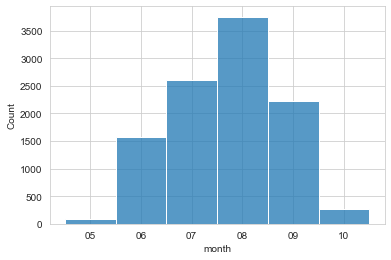

In [73]:
sns.histplot(X.month)

as the snow indicates, we only have summer months here

<h2>Looking if the mosquito positives are any different from the average</h2>

In [79]:
#grabbing values where WNV was found
pos = X[y==1].select_dtypes(include=['float','int'])

#and not found
neg = X[y==0].select_dtypes(include=['float','int'])

In [80]:
pos.describe()

Latitude   Longitude    spray_yr      Tmax_x      Tmin_x      Tavg_x  \
count  551.000000  551.000000  551.000000  551.000000  551.000000  551.000000   
mean    41.854891  -87.724663    0.217786   83.626134   65.088929   74.642468   
std      0.120243    0.104362    0.413116    6.272738    5.872067    5.404807   
min     41.644612  -87.930995    0.000000   58.000000   46.000000   52.000000   
25%     41.731922  -87.800991    0.000000   80.000000   61.000000   72.000000   
50%     41.903002  -87.725057    0.000000   83.000000   66.000000   75.000000   
75%     41.973967  -87.642984    0.000000   89.000000   69.000000   78.000000   
max     42.011601  -87.531635    1.000000   96.000000   76.000000   84.000000   

         Depart_x  DewPoint_x   WetBulb_x      Heat_x  ...        TS_y  \
count  551.000000  551.000000  551.000000  551.000000  ...  551.000000   
mean     4.268603   62.753176   67.043557    0.266788  ...    0.259528   
std      5.208428    6.520796    5.349419    1.597602  ...    0.438774   
min    -12.000000   40.000000   47.000000    0.000000  ...    0.000000   
25%      0.000000   58.000000   64.000000    0.000000  ...    0.000000   
50%      5.000000   64.000000   69.000000    0.000000  ...    0.000000   
75%      8.000000   67.000000   70.000000    0.000000  ...    1.000000   
max     18.000000   73.000000   76.000000   13.000000  ...    1.000000   

             DZ_y  BCFG_y  FG+_y  MIFG_y        FG_y   SQ_y   SN_y  VCFG_y  \
count  551.000000   551.0  551.0   551.0  551.000000  551.0  551.0   551.0   
mean     0.014519     0.0    0.0     0.0    0.068966    0.0    0.0     0.0   
std      0.119726     0.0    0.0     0.0    0.253626    0.0    0.0     0.0   
min      0.000000     0.0    0.0     0.0    0.000000    0.0    0.0     0.0   
25%      0.000000     0.0    0.0     0.0    0.000000    0.0    0.0     0.0   
50%      0.000000     0.0    0.0     0.0    0.000000    0.0    0.0     0.0   
75%      0.000000     0.0    0.0     0.0    0.000000    0.0    0.0     0.0   
max      1.000000     0.0    0.0     0.0    1.000000    0.0    0.0     0.0   

        GR_y  
count  551.0  
mean     0.0  
std      0.0  
min      0.0  
25%      0.0  
50%      0.0  
75%      0.0  
max      0.0  

[8 rows x 65 columns]

In [82]:
neg.describe()

Latitude    Longitude     spray_yr       Tmax_x       Tmin_x  \
count  9955.000000  9955.000000  9955.000000  9955.000000  9955.000000   
mean     41.840378   -87.698538     0.106881    81.749573    62.584731   
std       0.112269     0.095880     0.308977     8.364587     7.743809   
min      41.644612   -87.930995     0.000000    57.000000    41.000000   
25%      41.732984   -87.757639     0.000000    78.000000    58.000000   
50%      41.846075   -87.694259     0.000000    83.000000    64.000000   
75%      41.951866   -87.627796     0.000000    88.000000    69.000000   
max      42.017430   -87.531635     1.000000    96.000000    76.000000   

            Tavg_x     Depart_x   DewPoint_x    WetBulb_x       Heat_x  ...  \
count  9955.000000  9955.000000  9955.000000  9862.000000  9955.000000  ...   
mean     72.413561     2.655650    59.593872    64.497262     0.996484  ...   
std       7.607183     6.539716     7.816904     6.855761     2.912647  ...   
min      50.000000   -12.000000    39.000000    46.000000     0.000000  ...   
25%      69.000000    -2.000000    54.000000    61.000000     0.000000  ...   
50%      74.000000     4.000000    60.000000    65.000000     0.000000  ...   
75%      78.000000     8.000000    67.000000    70.000000     0.000000  ...   
max      84.000000    18.000000    73.000000    76.000000    15.000000  ...   

              TS_y         DZ_y  BCFG_y   FG+_y  MIFG_y         FG_y    SQ_y  \
count  9955.000000  9955.000000  9955.0  9955.0  9955.0  9955.000000  9955.0   
mean      0.204018     0.021095     0.0     0.0     0.0     0.010547     0.0   
std       0.403003     0.143708     0.0     0.0     0.0     0.102163     0.0   
min       0.000000     0.000000     0.0     0.0     0.0     0.000000     0.0   
25%       0.000000     0.000000     0.0     0.0     0.0     0.000000     0.0   
50%       0.000000     0.000000     0.0     0.0     0.0     0.000000     0.0   
75%       0.000000     0.000000     0.0     0.0     0.0     0.000000     0.0   
max       1.000000     1.000000     0.0     0.0     0.0     1.000000     0.0   

         SN_y  VCFG_y    GR_y  
count  9955.0  9955.0  9955.0  
mean      0.0     0.0     0.0  
std       0.0     0.0     0.0  
min       0.0     0.0     0.0  
25%       0.0     0.0     0.0  
50%       0.0     0.0     0.0  
75%       0.0     0.0     0.0  
max       0.0     0.0     0.0  

[8 rows x 65 columns]

In [85]:
t_conf(pos.spray_yr,neg.spray_yr,551,200)

(0.038607216501799296, 0.17963234792651284)

interesting result here. It looks like areas where there are WNV, there is more spraying, but not a huge amount more. That indicates that the city knows where mosquitos are and target those areas more heavily.

In [86]:
t_conf(pos.FG_x,neg.FG_x,551,200)

(-0.013738031218926723, 0.031814256264298776)

In [88]:
t_conf(pos.FG_y,neg.FG_y,551,200)

(0.02145412156867555, 0.09620468060918291)

maybe a bit more fog at one weather location when mosquitos are spotted. Higher humidity.

In [90]:
t_conf(pos.DewPoint_y,neg.DewPoint_y,551,200)

(1.3164420017943073, 4.282650557189359)

In [91]:
t_conf(pos.DewPoint_x,neg.DewPoint_x,551,200)

(1.8219769183506658, 4.521489506331728)

The dew point is significantly higher when mosquitos are found with WNV. Makes total sense with moisture in the air!